# Steps involved in the Analysis
     Importing Libraries
     Price Elasticity model
     Price Elasticity model (optional)
     Observation on Price Easlticty

## Importing Libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [49]:
df = pd.read_excel('D:/UpGrad/Cult Fit Project/Solution/Outlier_cleaned_classes.xlsx')
df.head()

,ActivitySiteID,ActivityDescription,BookingEndDateTime (Month / Day / Year),BookingStartTime,MaxBookees,Number Booked,Price (INR),Activity,Day,Week,Month,Occupancy,Revenue
0,HXP,20-20-20 2.45pm-3.45pm,2018-04-08,14:45:00,25,12,499,20-20-20,Sunday,14,4,0.48,5988
1,HXP,20-20-20 2.45pm-3.45pm,2018-04-15,14:45:00,25,15,499,20-20-20,Sunday,15,4,0.60,7485
2,HXP,20-20-20 2.45pm-3.45pm,2018-04-22,14:45:00,25,14,499,20-20-20,Sunday,16,4,0.56,6986
3,HXP,20-20-20 2.45pm-3.45pm,2018-04-29,14:45:00,25,9,499,20-20-20,Sunday,17,4,0.36,4491
4,HXP,20-20-20 2.45pm-3.45pm,2018-05-06,14:45:00,25,7,499,20-20-20,Sunday,18,5,0.28,3493


In [50]:
df.shape

(3131, 13)

## Price Elasticity Modelling

In [52]:
df.head()

,ActivitySiteID,ActivityDescription,BookingEndDateTime (Month / Day / Year),BookingStartTime,MaxBookees,Number Booked,Price (INR),Activity,Day,Week,Month,Occupancy,Revenue
0,HXP,20-20-20 2.45pm-3.45pm,2018-04-08,14:45:00,25,12,499,20-20-20,Sunday,14,4,0.48,5988
1,HXP,20-20-20 2.45pm-3.45pm,2018-04-15,14:45:00,25,15,499,20-20-20,Sunday,15,4,0.60,7485
2,HXP,20-20-20 2.45pm-3.45pm,2018-04-22,14:45:00,25,14,499,20-20-20,Sunday,16,4,0.56,6986
3,HXP,20-20-20 2.45pm-3.45pm,2018-04-29,14:45:00,25,9,499,20-20-20,Sunday,17,4,0.36,4491
4,HXP,20-20-20 2.45pm-3.45pm,2018-05-06,14:45:00,25,7,499,20-20-20,Sunday,18,5,0.28,3493


For price Easticity we will be considering featuses Price (target) , ActivitySite, MaxBookees, Number Booked, Day. dataframe will be called el_df

first we well be converting catagorical data to numeric getting dummies

next we will log scaling the data

after that we will slpit the data in train test

then we will make final call of features using VIF Variance Influencer Factor

In [54]:
el_df = df[['ActivitySiteID','Occupancy','Number Booked','Price (INR)','Day','MaxBookees']]

In [55]:
# changing catagorical column into numneric
cat_col = el_df.describe(include='object').columns.to_list()
cat_df = pd.get_dummies(df[cat_col],drop_first=True,dtype=int)
cat_df.head()

,ActivitySiteID_HXP,ActivitySiteID_NBL,ActivitySiteID_SBP,ActivitySiteID_TSC,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,1,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0


In [56]:
# merging the data frame 
el_df = pd.concat([el_df,cat_df],axis=1)

In [57]:
# dropping catagorical columns from dataframe
el_df = el_df.drop(cat_col, axis=1)

### Scaling

In [59]:
el_df['Occupancy'][el_df['Occupancy'] == 0]

Series([], Name: Occupancy, dtype: float64)

In [60]:
el_df['Number Booked'][el_df['Number Booked'] == 0]

Series([], Name: Number Booked, dtype: int64)

In [61]:
el_df['Price (INR)'][el_df['Price (INR)'] == 0]

Series([], Name: Price (INR), dtype: int64)

In [62]:
# log ScalingY
el_df[['Occupancy','Number Booked','Price (INR)','MaxBookees']] = np.log(el_df[['Occupancy','Number Booked','Price (INR)','MaxBookees']])

In [63]:
el_df.head()

,Occupancy,Number Booked,Price (INR),MaxBookees,ActivitySiteID_HXP,ActivitySiteID_NBL,ActivitySiteID_SBP,ActivitySiteID_TSC,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,-0.733969,2.484907,6.212606,3.218876,1,0,0,0,0,0,1,0,0,0
1,-0.510826,2.708050,6.212606,3.218876,1,0,0,0,0,0,1,0,0,0
2,-0.579818,2.639057,6.212606,3.218876,1,0,0,0,0,0,1,0,0,0
3,-1.021651,2.197225,6.212606,3.218876,1,0,0,0,0,0,1,0,0,0
4,-1.272966,1.945910,6.212606,3.218876,1,0,0,0,0,0,1,0,0,0


In [64]:
# creating Target (Y) and and independent (X)Features
Y = el_df.pop('Number Booked')
X = el_df

### Splitting

In [66]:
# spiliting into train test 70% and 30% respectively
x_train,x_test,y_train,y_test = train_test_split(X,Y, train_size=0.8, random_state= 40)

In [67]:
# checking for shapes
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(2504, 13) (627, 13) (2504,) (627,)


### Modelling

In [69]:
# creating a linear regression model
x_train_sm = sm.add_constant(x_train) # Adding Constant
model = sm.OLS(y_train,x_train_sm)
model = model.fit()

In [70]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Number Booked   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     4808.
Date:                Thu, 04 Dec 2025   Prob (F-statistic):               0.00
Time:                        15:19:17   Log-Likelihood:                 1225.5
No. Observations:                2504   AIC:                            -2423.
Df Residuals:                    2490   BIC:                            -2341.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2420      0.060     -4.021      0.000      -0.360      -0.124
Occupancy              0.9711      0.005    181.511      0.000       0.961       0.982
Price (INR)           -0.0553      0.007     -8.120      0.000      -0.069      -0.042
MaxBookees             1.1823      0.008    153.028      0.000       1.167       1.197
ActivitySiteID_HXP     0.0770      0.009      8.820      0.000       0.060       0.094
ActivitySiteID_NBL     0.0270      0.012      2.241      0.025       0.003       0.051
ActivitySiteID_SBP     0.0253      0.009      2.763      0.006       0.007       0.043
ActivitySiteID_TSC     0.0573      0.010      5.885      0.000       0.038       0.076
Day_Monday            -0.0048      0.011     -0.450      0.653      -0.026       0.016
Day_Saturday           0.0183      0.013      1.393      0.164      -0.007       0.044
Day_Sunday            -0.0882      0.015     -5.772      0.000      -0.118      -0.058
Day_Thursday          -0.0161      0.011     -1.498      0.134      -0.037       0.005
Day_Tuesday           -0.0081      0.011     -0.765      0.445      -0.029       0.013
Day_Wednesday         -0.0011      0.010     -0.112      0.911      -0.021       0.019
==============================================================================
Omnibus:                     2507.307   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           132742.195
Skew:                          -4.892   Prob(JB):                         0.00
Kurtosis:                      37.301   Cond. No.                         169.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Vif and Feature selecting

In [72]:
# Creatinf VIF to see multicollinearity
vif = pd.DataFrame()
vif['Features'] = x_train_sm.columns
vif['Vif'] = [variance_inflation_factor(x_train_sm.values,i) for i in range(x_train_sm.shape[1])]
vif = vif.sort_values(by='Vif', ascending=False)
vif

,Features,Vif
0,const,409.921014
5,ActivitySiteID_NBL,2.030845
13,Day_Wednesday,1.938586
12,Day_Tuesday,1.853166
11,Day_Thursday,1.846359
8,Day_Monday,1.759237
6,ActivitySiteID_SBP,1.605391
4,ActivitySiteID_HXP,1.602609
7,ActivitySiteID_TSC,1.497105
3,MaxBookees,1.457251


No feature has high vif we will filter out features on the basis of significance

In [74]:
x_train_sm = x_train_sm.drop('Day_Wednesday',axis=1)

In [75]:
# repeating the model again (2)
model = sm.OLS(y_train,x_train_sm)
model = model.fit()

In [76]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Number Booked   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     5211.
Date:                Thu, 04 Dec 2025   Prob (F-statistic):               0.00
Time:                        15:19:18   Log-Likelihood:                 1225.4
No. Observations:                2504   AIC:                            -2425.
Df Residuals:                    2491   BIC:                            -2349.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2428      0.060     -4.063      0.000      -0.360      -0.126
Occupancy              0.9710      0.005    181.721      0.000       0.961       0.982
Price (INR)           -0.0553      0.007     -8.124      0.000      -0.069      -0.042
MaxBookees             1.1822      0.008    153.334      0.000       1.167       1.197
ActivitySiteID_HXP     0.0770      0.009      8.826      0.000       0.060       0.094
ActivitySiteID_NBL     0.0270      0.012      2.246      0.025       0.003       0.051
ActivitySiteID_SBP     0.0254      0.009      2.783      0.005       0.007       0.043
ActivitySiteID_TSC     0.0574      0.010      5.902      0.000       0.038       0.076
Day_Monday            -0.0042      0.009     -0.466      0.641      -0.022       0.013
Day_Saturday           0.0190      0.012      1.618      0.106      -0.004       0.042
Day_Sunday            -0.0875      0.014     -6.251      0.000      -0.115      -0.060
Day_Thursday          -0.0154      0.009     -1.730      0.084      -0.033       0.002
Day_Tuesday           -0.0074      0.009     -0.851      0.395      -0.025       0.010
==============================================================================
Omnibus:                     2507.218   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           132722.723
Skew:                          -4.892   Prob(JB):                         0.00
Kurtosis:                      37.298   Cond. No.                         168.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

No features have Much see multicollinearity, we will be removing which as more significance than 5% setp by setp

In [78]:
x_train_sm = x_train_sm.drop('Day_Monday',axis=1)

In [79]:
# repeating the model again (3)
model = sm.OLS(y_train,x_train_sm)
model = model.fit()

In [80]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Number Booked   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     5686.
Date:                Thu, 04 Dec 2025   Prob (F-statistic):               0.00
Time:                        15:19:18   Log-Likelihood:                 1225.3
No. Observations:                2504   AIC:                            -2427.
Df Residuals:                    2492   BIC:                            -2357.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2426      0.060     -4.060      0.000      -0.360      -0.125
Occupancy              0.9710      0.005    181.750      0.000       0.961       0.982
Price (INR)           -0.0554      0.007     -8.142      0.000      -0.069      -0.042
MaxBookees             1.1820      0.008    153.658      0.000       1.167       1.197
ActivitySiteID_HXP     0.0770      0.009      8.822      0.000       0.060       0.094
ActivitySiteID_NBL     0.0270      0.012      2.246      0.025       0.003       0.051
ActivitySiteID_SBP     0.0252      0.009      2.766      0.006       0.007       0.043
ActivitySiteID_TSC     0.0573      0.010      5.896      0.000       0.038       0.076
Day_Saturday           0.0203      0.011      1.781      0.075      -0.002       0.043
Day_Sunday            -0.0862      0.014     -6.283      0.000      -0.113      -0.059
Day_Thursday          -0.0141      0.008     -1.669      0.095      -0.031       0.002
Day_Tuesday           -0.0061      0.008     -0.741      0.459      -0.022       0.010
==============================================================================
Omnibus:                     2507.504   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           132792.129
Skew:                          -4.893   Prob(JB):                         0.00
Kurtosis:                      37.307   Cond. No.                         168.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
x_train_sm = x_train_sm.drop('Day_Saturday',axis=1)

In [82]:
# repeating the model again (4)
model = sm.OLS(y_train,x_train_sm)
model = model.fit()

In [83]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Number Booked   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     6249.
Date:                Thu, 04 Dec 2025   Prob (F-statistic):               0.00
Time:                        15:19:18   Log-Likelihood:                 1223.7
No. Observations:                2504   AIC:                            -2425.
Df Residuals:                    2493   BIC:                            -2361.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2425      0.060     -4.057      0.000      -0.360      -0.125
Occupancy              0.9718      0.005    182.477      0.000       0.961       0.982
Price (INR)           -0.0550      0.007     -8.083      0.000      -0.068      -0.042
MaxBookees             1.1819      0.008    153.582      0.000       1.167       1.197
ActivitySiteID_HXP     0.0773      0.009      8.853      0.000       0.060       0.094
ActivitySiteID_NBL     0.0287      0.012      2.391      0.017       0.005       0.052
ActivitySiteID_SBP     0.0260      0.009      2.864      0.004       0.008       0.044
ActivitySiteID_TSC     0.0574      0.010      5.898      0.000       0.038       0.076
Day_Sunday            -0.0889      0.014     -6.517      0.000      -0.116      -0.062
Day_Thursday          -0.0168      0.008     -2.021      0.043      -0.033      -0.000
Day_Tuesday           -0.0088      0.008     -1.084      0.278      -0.025       0.007
==============================================================================
Omnibus:                     2514.487   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           134345.123
Skew:                          -4.913   Prob(JB):                         0.00
Kurtosis:                      37.513   Cond. No.                         168.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
x_train_sm = x_train_sm.drop('Day_Tuesday',axis=1)

In [85]:
# repeating the model again (5)
model = sm.OLS(y_train,x_train_sm)
model = model.fit()

In [86]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Number Booked   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     6943.
Date:                Thu, 04 Dec 2025   Prob (F-statistic):               0.00
Time:                        15:19:19   Log-Likelihood:                 1223.2
No. Observations:                2504   AIC:                            -2426.
Df Residuals:                    2494   BIC:                            -2368.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2474      0.060     -4.150      0.000      -0.364      -0.130
Occupancy              0.9716      0.005    182.563      0.000       0.961       0.982
Price (INR)           -0.0543      0.007     -8.017      0.000      -0.068      -0.041
MaxBookees             1.1812      0.008    153.964      0.000       1.166       1.196
ActivitySiteID_HXP     0.0772      0.009      8.839      0.000       0.060       0.094
ActivitySiteID_NBL     0.0285      0.012      2.376      0.018       0.005       0.052
ActivitySiteID_SBP     0.0259      0.009      2.851      0.004       0.008       0.044
ActivitySiteID_TSC     0.0569      0.010      5.852      0.000       0.038       0.076
Day_Sunday            -0.0868      0.014     -6.428      0.000      -0.113      -0.060
Day_Thursday          -0.0147      0.008     -1.822      0.069      -0.031       0.001
==============================================================================
Omnibus:                     2515.201   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           134534.451
Skew:                          -4.914   Prob(JB):                         0.00
Kurtosis:                      37.538   Cond. No.                         167.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Predicting 

In [88]:
y_train_pred = model.predict(x_train_sm)
y_train_pred

2194    3.381761
2885    2.887347
1083    0.551394
316     2.880994
2160    3.463843
          ...   
1330    2.156016
3064    1.948280
2213    1.100945
2055    3.201302
2267    2.058277
Length: 2504, dtype: float64

In [89]:
prediction = pd.DataFrame()
prediction['y_train'] = y_train
prediction['y_pred'] = y_train_pred
prediction

,y_train,y_pred
2194,3.367296,3.381761
2885,2.890372,2.887347
1083,0.693147,0.551394
316,2.890372,2.880994
2160,3.465736,3.463843
...,...,...
1330,2.197225,2.156016
3064,1.945910,1.948280
2213,0.000000,1.100945
2055,3.258097,3.201302


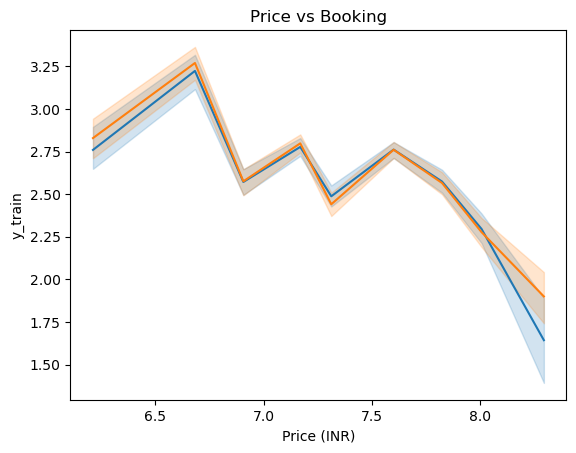

In [90]:
plt.title('Price vs Booking')
sns.lineplot(x= x_train.iloc[:,1],y=prediction['y_train'])
sns.lineplot(x= x_train.iloc[:,1],y=prediction['y_pred'])
plt.show()

### Predicting test

In [92]:
cols = x_train_sm.columns
cols = [x for x in cols if x != 'const']
x_test_sm = sm.add_constant(x_test[cols])

In [93]:
y_test_pred = model.predict(x_test_sm)
y_test_pred

1057    2.310680
1011    2.479535
2156    3.108099
2931    3.270647
1386    3.004809
          ...   
86      2.575726
1778    3.256098
1827    1.858842
1104    1.113847
1543    2.910309
Length: 627, dtype: float64

In [94]:
prediction = pd.DataFrame()
prediction['y_test'] = y_test
prediction['y_pred'] = y_test_pred
prediction

,y_test,y_pred
1057,2.302585,2.310680
1011,2.484907,2.479535
2156,3.178054,3.108099
2931,3.218876,3.270647
1386,3.044522,3.004809
...,...,...
86,2.564949,2.575726
1778,3.258097,3.256098
1827,2.079442,1.858842
1104,0.000000,1.113847


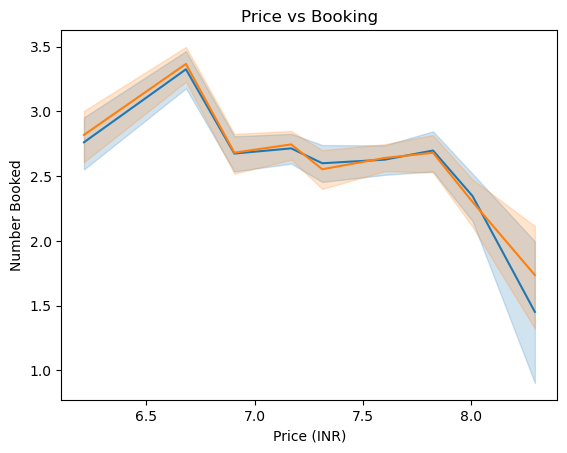

In [95]:
plt.title('Price vs Booking')
sns.lineplot(x=x_test.iloc[:,1],y=y_test)
sns.lineplot(x=x_test.iloc[:,1],y=y_test_pred)
plt.show()

### Evaluations

In [97]:
# mean squared error of train set
mean_squared_error(y_train,y_train_pred)

0.022041269178472243

In [98]:
# mean squared error of test set
mean_squared_error(y_test,y_test_pred)

0.01631623723184369

In [99]:
# squared mean squared error of train set
np.sqrt(mean_squared_error(y_train,y_train_pred))

0.1484630229332282

In [100]:
# squared mean squared error of test set
np.sqrt(mean_squared_error(y_test,y_test_pred))

0.12773502742726323

In [101]:
# r2_score of train
r2_score(y_train,y_train_pred)

0.9616173855565334

In [102]:
# r2_score of test
r2_score(y_test,y_test_pred)

0.9735613642187516

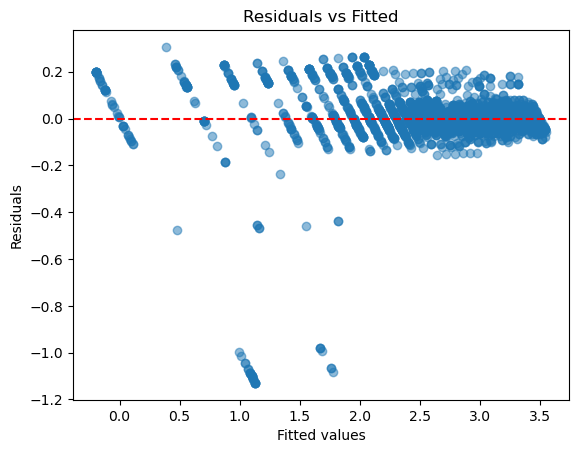

In [103]:
# Ploting Residual chat
fitted = model.fittedvalues
residual = model.resid

plt.scatter(fitted, residual, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

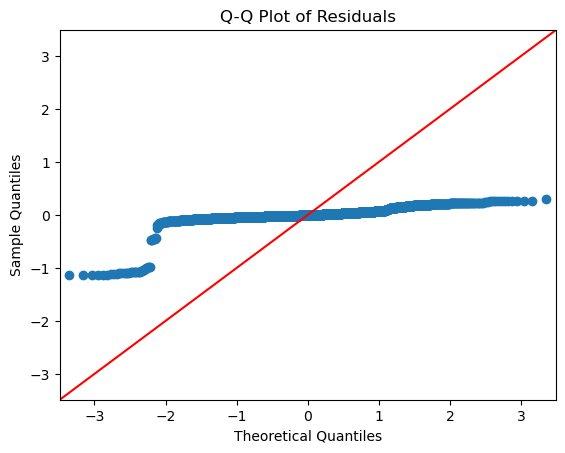

In [104]:
sm.qqplot(residual, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

## Price Elasticity with one Dependent and one non Dependent variable (optional)

In [106]:
eldf = df[['Number Booked','Price (INR)']]

In [107]:
eldf

,Number Booked,Price (INR)
0,12,499
1,15,499
2,14,499
3,9,499
4,7,499
...,...,...
3126,9,1299
3127,9,1299
3128,16,1299
3129,13,1299


In [108]:
# log ScalingY
eldf = np.log(eldf)

In [109]:
# creating Target (Y) and and independent (X)Features
Y = eldf.pop('Number Booked')
X = eldf

In [110]:
# spiliting into train test 70% and 30% respectively
x_train,x_test,y_train,y_test = train_test_split(X,Y, train_size=0.8, random_state= 40)

In [111]:
# checking for shapes
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(2504, 1) (627, 1) (2504,) (627,)


In [112]:
# creating a linear regression model
x_train_sm = sm.add_constant(x_train) # Adding Constant
model = sm.OLS(y_train,x_train_sm)
model = model.fit()

In [113]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Number Booked   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     74.33
Date:                Thu, 04 Dec 2025   Prob (F-statistic):           1.15e-17
Time:                        15:19:23   Log-Likelihood:                -2821.9
No. Observations:                2504   AIC:                             5648.
Df Residuals:                    2502   BIC:                             5659.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.6968      0.248     18.970      0.000       4.211       5.182
Price (INR)    -0.2866      0.033     -8.622      0.000      -0.352      -0.221
==============================================================================
Omnibus:                      606.487   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1276.536
Skew:                          -1.402   Prob(JB):                    6.36e-278
Kurtosis:                       5.092   Cond. No.                         126.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
book_pred = model.predict(x_train_sm)

<Axes: xlabel='Price (INR)', ylabel='None'>

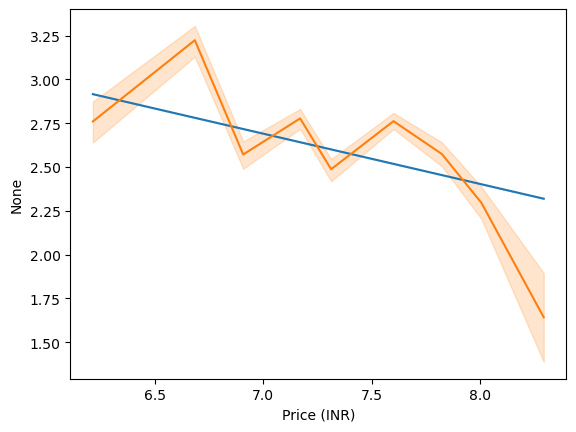

In [115]:
sns.lineplot(x=x_train['Price (INR)'],y=book_pred)
sns.lineplot(x=x_train['Price (INR)'],y=y_train)

In [116]:
cols = x_train_sm.columns
cols = [x for x in cols if x != 'const']
x_test_sm = sm.add_constant(x_test[cols])

In [117]:
y_test_pred = model.predict(x_test_sm)
y_test_pred

1057    2.319354
1011    2.454122
2156    2.600626
2931    2.716948
1386    2.401841
          ...   
86      2.641675
1778    2.518115
1827    2.600626
1104    2.319354
1543    2.716948
Length: 627, dtype: float64

<Axes: xlabel='Price (INR)', ylabel='None'>

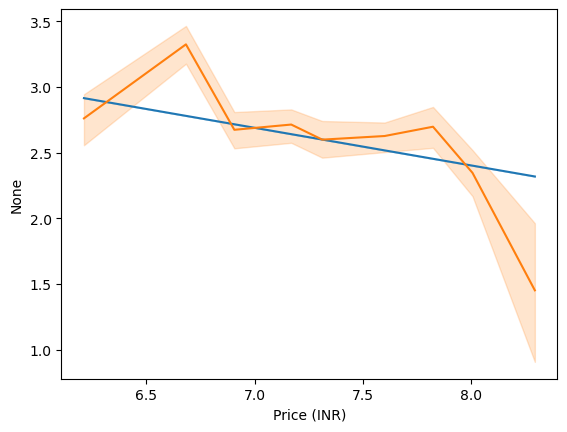

In [118]:
sns.lineplot(x=x_test['Price (INR)'],y=y_test_pred)
sns.lineplot(x=x_test['Price (INR)'],y=y_test)

## Observation of Price Elasticity 

Price Elasticty model on the basis of multiple features such as MaxBookees, Price, Site and Days, Occupancy shows that every 1% change in price will shown approx 5% change in Number of Booking

Model was able to explain 96% variance in Number Booked, train and test set has MSE of 2.2% and 1.7% respectively, train and test set has sqrt MSE of 14.8% and 12.9% respectively

Also tried modelling using one target and one independent variable that is Number Booked and Price, without taking other features into consideration, price elasticity was seen around 29%, which means 1% cahnge in Price will drop the Number of Booking to 29%.

And this model could explain 3% variance in the Number Booked and MSE for train and test is 55% and 61% respectively, sqrt MSE od train test is 74% and 
78% respectively